In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Load data from YouTube and Reddit CSV files into DataFrames
youtube_df = pd.read_csv('youtube_video_data_with_comments.csv')
reddit_df = pd.read_csv('All_Data.csv')

# Extract unique usernames from both DataFrames
youtube_users = set(youtube_df['comment_author'])
reddit_users = set(reddit_df['comment_author'])

# Find common users
common_users = youtube_users.intersection(reddit_users)

In [3]:
common_users

{'ReallyBoredMan', 'SecondEngineer', 'manuvns'}

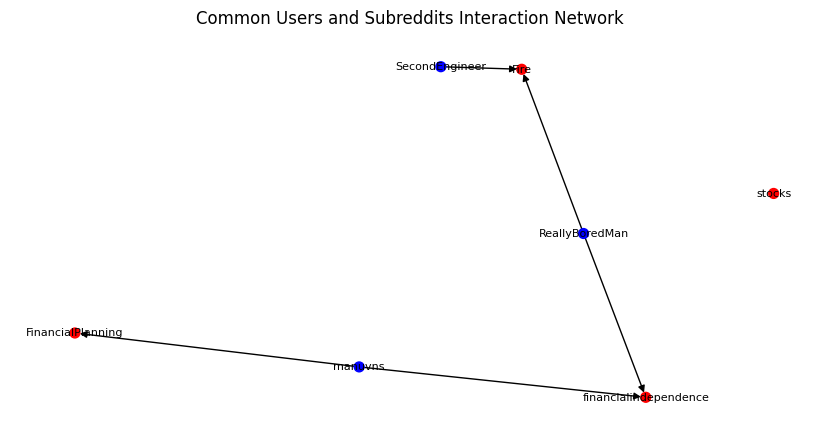

In [6]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes for common users and subreddits
for user in common_users:
    G.add_node(user, type='user')
for subreddit in reddit_df['subreddit_name']:
    G.add_node(subreddit, type='subreddit')

# Add edges representing comments made by common users in subreddits
for index, row in reddit_df.iterrows():
    if row['comment_author'] in common_users:
        G.add_edge(row['comment_author'], row['subreddit_name'])

# Create a layout for the graph
layout = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(8, 4))
node_colors = ['blue' if G.nodes[node]['type'] == 'user' else 'red' for node in G.nodes()]
nx.draw(G, layout, node_size=50, node_color=node_colors, with_labels=True, font_size=8, font_color='black')
plt.title('Common Users and Subreddits Interaction Network')
plt.show()

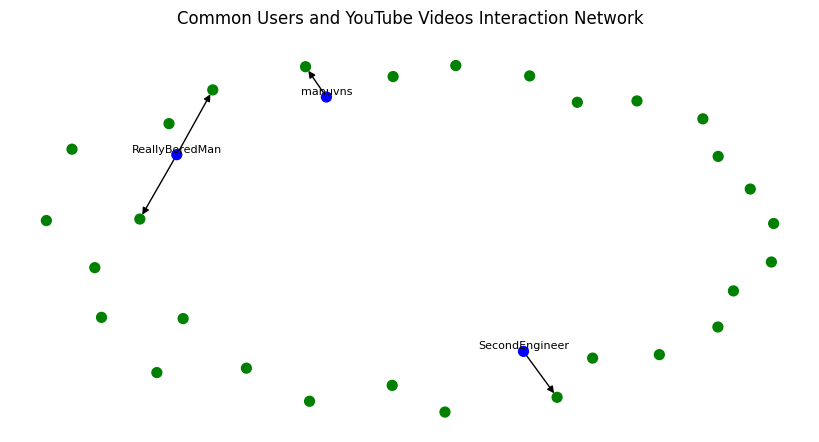

In [14]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes for common users and YouTube videos
for user in common_users:
    G.add_node(user, type='user')
for Title in youtube_df['Title']:
    G.add_node(Title, type='video')

# Add edges representing comments made by common users on YouTube videos
for index, row in youtube_df.iterrows():
    if row['comment_author'] in common_users:
        G.add_edge(row['comment_author'], row['Title'])

# Create a layout for the graph
layout = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(8, 4))
node_colors = ['blue' if G.nodes[node]['type'] == 'user' else 'green' for node in G.nodes()]
nx.draw(G, layout, node_size=50, node_color=node_colors, with_labels=False, font_size=8, font_color='black')

# Add labels to user nodes
user_labels = {node: node for node in G.nodes if G.nodes[node]['type'] == 'user'}
pos_user_labels = {k: (v[0], v[1] + 0.03) for k, v in layout.items() if k in user_labels}
nx.draw_networkx_labels(G, pos_user_labels, user_labels, font_size=8)

plt.title('Common Users and YouTube Videos Interaction Network')
plt.show()

In [8]:
youtube_df.head(5)

,Video ID,Title,Description,View Count,Like Count,Comment Count,Upload Date,Channel Name,Comment,comment_author
0,PMz5yIzPHjo,The stages of F.I.R.E. (Financial Independence...,There are many paths that can lead to success ...,17711,616,87,2023-06-25T22:04:28Z,Dividend Growth Investing,Which stage are you working towards?\r\nTry M1...,Dividend Growth Investing
1,PMz5yIzPHjo,The stages of F.I.R.E. (Financial Independence...,There are many paths that can lead to success ...,17711,616,87,2023-06-25T22:04:28Z,Dividend Growth Investing,I think mine is barista fire 🔥,the.hippie.spirit
2,PMz5yIzPHjo,The stages of F.I.R.E. (Financial Independence...,There are many paths that can lead to success ...,17711,616,87,2023-06-25T22:04:28Z,Dividend Growth Investing,So helpful,Adoring Your Hair
3,PMz5yIzPHjo,The stages of F.I.R.E. (Financial Independence...,There are many paths that can lead to success ...,17711,616,87,2023-06-25T22:04:28Z,Dividend Growth Investing,Glad it was helpful!,Dividend Growth Investing
4,PMz5yIzPHjo,The stages of F.I.R.E. (Financial Independence...,There are many paths that can lead to success ...,17711,616,87,2023-06-25T22:04:28Z,Dividend Growth Investing,Thank you for the information!! I’m really new...,Riley Kate


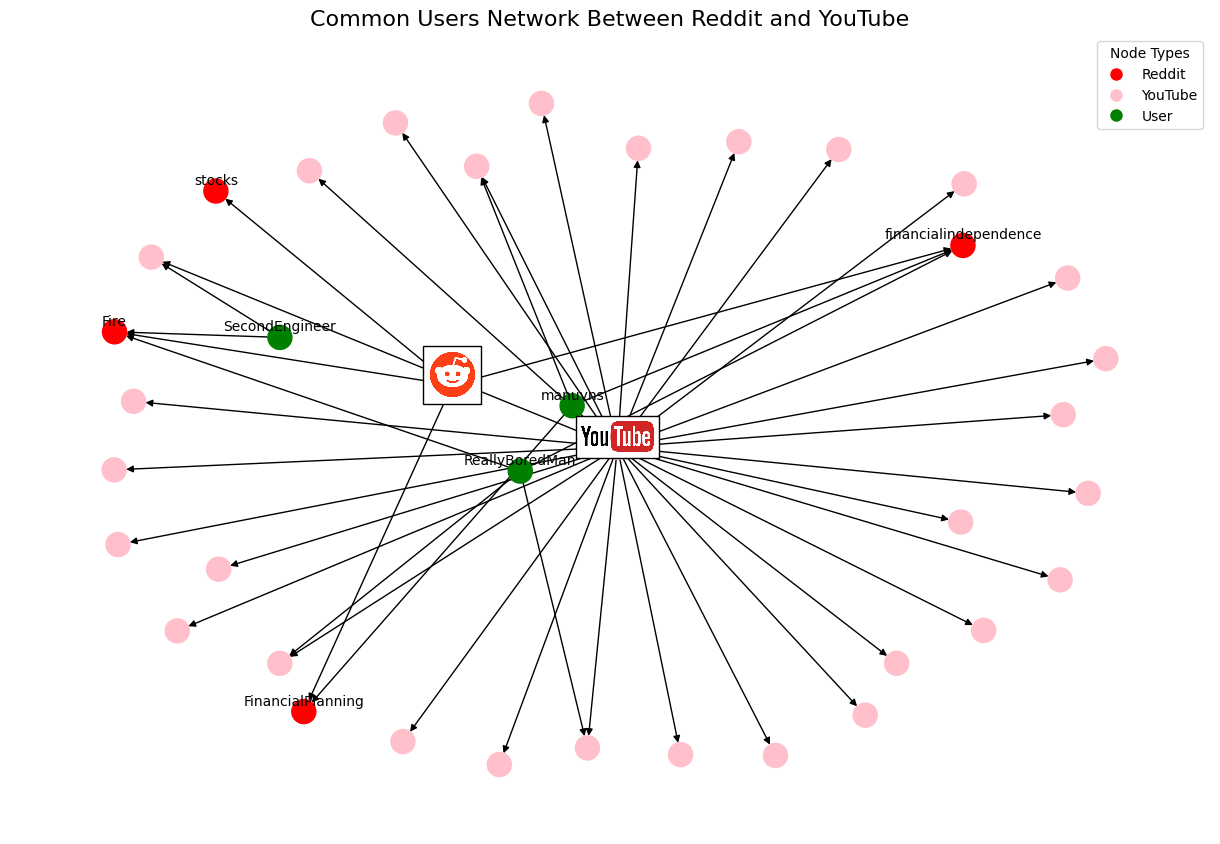

In [64]:

# Create a directed graph
G = nx.DiGraph()

# Add central nodes for Reddit and YouTube
G.add_node('Reddit', type='platform', color='red')
G.add_node('YouTube', type='platform', color='pink')

# Add subreddits as nodes and connect to Reddit
subreddits = set(reddit_df['subreddit_name'])
for subreddit in subreddits:
    G.add_node(subreddit, type='subreddit', color='red')
    G.add_edge('Reddit', subreddit)

# Add videos as nodes and connect to YouTube
videos = set(youtube_df['Title'])
for video in videos:
    G.add_node(video, type='video', color='pink')
    G.add_edge('YouTube', video)

# Add common users as nodes and connect to subreddits and videos
for user in common_users:
    G.add_node(user, type='user', color='green')
    for index, row in reddit_df.iterrows():
        if row['comment_author'] == user:
            G.add_edge(user, row['subreddit_name'])
    for index, row in youtube_df.iterrows():
        if row['comment_author'] == user:
            G.add_edge(user, row['Title'])

# Create a layout for the graph
layout = nx.spring_layout(G, seed=42)

# Draw the graph with some style
plt.figure(figsize=(12, 8))

# Define colors for nodes based on their type
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Filter out YouTube video titles when specifying labels for platforms
platform_labels = {k: k for k in G.nodes if G.nodes[k]['type'] == 'platform'}

# Draw the graph with labels (only for platforms)
nx.draw(G, layout, node_color=node_colors, labels=None, with_labels=False, font_size=10, font_color='black', font_weight='bold', node_shape='o')

# Draw labels for platform nodes
platform_pos_labels = {k: (v[0], v[1] + 0.03) for k, v in layout.items() if k in platform_labels}

# Draw labels for subreddit nodes
subreddit_labels = {k: k for k in G.nodes if G.nodes[k]['type'] == 'subreddit'}
subreddit_pos_labels = {k: (v[0], v[1] + 0.03) for k, v in layout.items() if k in subreddit_labels}
nx.draw_networkx_labels(G, subreddit_pos_labels, labels=subreddit_labels, font_size=10)

# Draw labels for user nodes
user_labels = {k: k for k in G.nodes if G.nodes[k]['type'] == 'user'}
user_pos_labels = {k: (v[0], v[1] + 0.03) for k, v in layout.items() if k in user_labels}
nx.draw_networkx_labels(G, user_pos_labels, labels=user_labels, font_size=10)

# Add platform icons as node images
icon_size = 0.15  # Size of the platform icons

for platform in platform_labels:
    icon_path = f'{platform.lower()}.png'  # Icon filename based on platform name (e.g., reddit_icon.png)
    img = plt.imread(icon_path)
    imagebox = OffsetImage(img, zoom=icon_size)
    ab = AnnotationBbox(imagebox, platform_pos_labels[platform])
    plt.gca().add_artist(ab)

# Add a legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Reddit'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='YouTube'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='User')],
           title="Node Types", loc='upper right')

# Set the title
plt.title('Common Users Network Between Reddit and YouTube', fontsize=16)

# Show the graph
plt.show()
